In [888]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        #self.hiddenLayerSize=3
        self.hiddenLayerSize=10
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        #self.a2 = self.sigmoid(self.z2)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        #yHat = self.sigmoid(self.z3)
        yHat = self.relu(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        #delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        delta3 = np.multiply(-(y-self.yHat),self.reluPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        #delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        delta2=np.dot(delta3,self.W2.T)*self.reluPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    

In [889]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [890]:
X


array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [891]:
y

array([[75.],
       [80.],
       [93.]])

In [892]:
X=X/np.amax(X,axis=0)
y=y/100

In [893]:
X,y


(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

In [894]:
NN=Neural_Network()

In [895]:
yH=NN.forward(X)

In [896]:
yH

array([[3.53618904],
       [1.44318646],
       [2.27949174]])

In [897]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

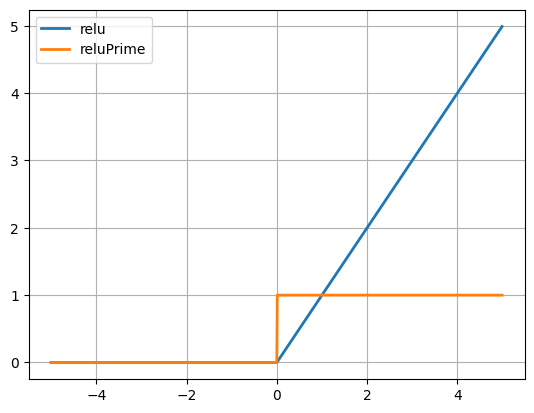

In [898]:
testValues=np.arange(-5,5,0.01)
# plt.plot(testValues,NN.sigmoid(testValues),linewidth=2)
# plt.plot(testValues, NN.sigmoidPrime(testValues),linewidth=2)
plt.plot(testValues,NN.relu(testValues),linewidth=2)
plt.plot(testValues, NN.reluPrime(testValues),linewidth=2)
plt.grid(1)
# plt.legend(['Sigmoid','SigmoidPrime'])
plt.legend(['relu','reluPrime'])


In [899]:
NN=Neural_Network()

In [900]:
cost1=NN.costFunction(X,y)

In [901]:
cost1

array([0.53539763])

In [902]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [903]:
dJdW1

array([[0.33885291, 0.41689674, 0.53124105, 0.26998959, 0.17508099,
        0.12963025, 0.11677446, 0.02303057, 0.54018132, 0.01619729],
       [0.31463657, 0.38710295, 0.49327558, 0.25069461, 0.16256872,
        0.12036614, 0.1084291 , 0.02138468, 0.50157693, 0.01503974]])

In [904]:
dJdW2

array([[1.17061441],
       [0.4953397 ],
       [1.3859207 ],
       [0.49088048],
       [0.45435621],
       [1.02823445],
       [1.10727011],
       [0.65995863],
       [0.95129756],
       [0.64108088]])

In [905]:
scalar=1
NN.W1 = NN.W1+scalar*dJdW1
NN.W2 = NN.W2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print (cost1,cost2)

[0.53539763] [115.53307059]


[115.53307059] [108.6403484]


'\nWhen the learning rate is small enough, we can see the cost slowly gets to its minimum. We can bound it.\nWhen the learning rate is unusually large, the cost forcefully increases even when we use subtraction to decrease the weights.\nWhen using ReLu activation function, we see that the cost decreases even faster, so we need to make the learning rate smaller or it would blow up.\n\n'

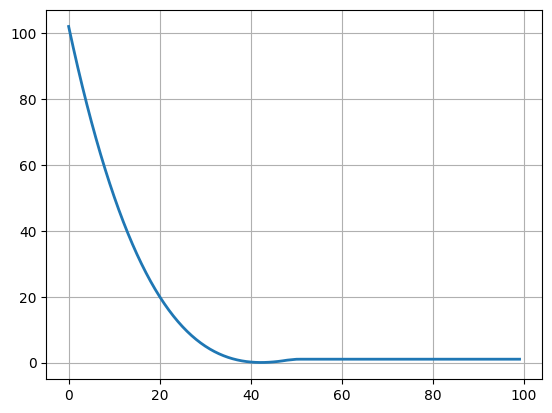

In [906]:
scalar=0.025
N = 100
threshold = 1e-3
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost3 = NN.costFunction(X,y)
print (cost2,cost3)
costs = []
iterations = []
for i in range(N):
    #dJdW1,dJdW2=NN.costFunctionPrime(X,y)
    NN.W1 = NN.W1-scalar*dJdW1
    NN.W2 = NN.W2-scalar*dJdW2
    cost3 = NN.costFunction(X,y)
    iterations.append(i)
    costs.append(cost3)

plt.plot(iterations, costs, linewidth=2)
plt.grid(1)

"""
When the learning rate is small enough, we can see the cost slowly gets to its minimum. We can bound it.
When the learning rate is unusually large, the cost forcefully increases even when we use subtraction to decrease the weights.
When using ReLu activation function, we see that the cost decreases even faster, so we need to make the learning rate smaller or it would blow up.
When we increase the hidden layers to 10, the cost doesn't seem to go back up anymore as it stays really close to its minimum.
"""